# Dealing with missing values

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=3)
%matplotlib inline
plt.rcParams["figure.dpi"] = 300

In [9]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
X, y = iris.data, iris.target
X, y = shuffle(X, y)

In [11]:
print(X[:30])

[[5.6 2.7 4.2 1.3]
 [4.7 3.2 1.3 0.2]
 [5.7 2.8 4.5 1.3]
 [5.8 2.8 5.1 2.4]
 [5.6 3.  4.1 1.3]
 [7.6 3.  6.6 2.1]
 [5.  3.3 1.4 0.2]
 [6.3 2.3 4.4 1.3]
 [5.1 3.3 1.7 0.5]
 [6.4 3.2 5.3 2.3]
 [6.1 2.9 4.7 1.4]
 [4.4 3.2 1.3 0.2]
 [5.5 4.2 1.4 0.2]
 [7.2 3.2 6.  1.8]
 [5.7 2.6 3.5 1. ]
 [5.8 2.7 5.1 1.9]
 [6.4 2.7 5.3 1.9]
 [6.1 2.8 4.7 1.2]
 [5.5 2.6 4.4 1.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.3 5.7 2.5]
 [5.7 2.9 4.2 1.3]
 [5.  3.4 1.6 0.4]
 [6.9 3.1 5.1 2.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [4.8 3.1 1.6 0.2]
 [6.3 2.5 5.  1.9]
 [5.  3.5 1.3 0.3]
 [4.6 3.6 1.  0.2]]


In [12]:
# a column is mostly missing
rng = np.random.RandomState(0)
X_missing_column = X.copy()
mask = X.sum(axis=1) < rng.normal(loc=19, scale=3, size=X.shape[0])
X_missing_column[mask, 0] = np.NaN
X_missing_column[120:]

array([[nan, 2.8, 4.6, 1.5],
       [nan, 3. , 1.4, 0.3],
       [nan, 2. , 3.5, 1. ],
       [nan, 3. , 6.1, 2.3],
       [6.3, 3.3, 6. , 2.5],
       [nan, 3. , 4.4, 1.4],
       [nan, 2.4, 3.8, 1.1],
       [nan, 4. , 1.2, 0.2],
       [nan, 2.9, 4.3, 1.3],
       [nan, 2.8, 5.6, 2.1],
       [6.5, 3. , 5.8, 2.2],
       [nan, 3.1, 4.7, 1.5],
       [nan, 2.6, 4. , 1.2],
       [nan, 2.5, 4.5, 1.7],
       [nan, 3.5, 1.3, 0.2],
       [nan, 2.5, 5.8, 1.8],
       [nan, 3.4, 1.5, 0.2],
       [nan, 3.4, 1.4, 0.3],
       [nan, 2.7, 3.9, 1.2],
       [nan, 3.6, 1.4, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [nan, 3. , 4.6, 1.4],
       [nan, 3. , 5.1, 1.8],
       [nan, 3.3, 5.7, 2.1],
       [nan, 2.8, 6.1, 1.9],
       [nan, 3.7, 1.5, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [nan, 2.3, 1.3, 0.3],
       [nan, 3.1, 1.5, 0.1],
       [nan, 3. , 1.1, 0.1]])

In [13]:
# only a few rows have missing data. but a lot of it
rng = np.random.RandomState(4)
X_missing_rows = X.copy()
for i in rng.randint(0, 30, 5):
    X_missing_rows[i, rng.uniform(size=4)> .2] = np.NaN
X_missing_rows[:30]

array([[5.6, 2.7, 4.2, 1.3],
       [nan, nan, 1.3, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2.8, 5.1, 2.4],
       [5.6, 3. , 4.1, 1.3],
       [nan, nan, nan, nan],
       [5. , 3.3, 1.4, 0.2],
       [6.3, 2.3, 4.4, 1.3],
       [5.1, 3.3, 1.7, 0.5],
       [6.4, 3.2, 5.3, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [4.4, 3.2, 1.3, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [nan, nan, nan, nan],
       [5.8, 2.7, 5.1, 1.9],
       [6.4, 2.7, 5.3, 1.9],
       [6.1, 2.8, 4.7, 1.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.3, 5.7, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.4, 1.6, 0.4],
       [6.9, nan, nan, nan],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [nan, nan, nan, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5. , 3.5, 1.3, 0.3],
       [4.6, 3.6, 1. , 0.2]])

In [14]:
X[y==2].mean(axis=0)

array([6.588, 2.974, 5.552, 2.026])

In [15]:
# some values missing only
rng = np.random.RandomState(0)
X_some_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[5.6, 2.7, 4.2, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [5.7, 2.8, nan, 1.3],
       [5.8, 2.8, nan, 2.4],
       [5.6, 3. , 4.1, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5. , 3.3, 1.4, 0.2],
       [6.3, 2.3, nan, 1.3],
       [5.1, 3.3, 1.7, 0.5],
       [6.4, 3.2, nan, nan],
       [6.1, 2.9, nan, 1.4],
       [4.4, 3.2, 1.3, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [7.2, 3.2, nan, nan],
       [5.7, 2.6, 3.5, 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [6.4, 2.7, nan, 1.9],
       [6.1, 2.8, nan, 1.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.3, nan, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.4, 1.6, 0.4],
       [6.9, 3.1, nan, nan],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, nan],
       [4.8, 3.1, 1.6, 0.2],
       [6.3, 2.5, nan, nan],
       [5. , 3.5, 1.3, 0.3],
       [4.6, 3.6, 1. , 0.2]])

In [16]:
# from now on use X_ = X_some_missing
X_ = X_some_missing

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = LogisticRegression().fit(X_drop_columns, y_train)
logreg.score(X_test[:, ~nan_columns], y_test)


C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7631578947368421

In [19]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="mean").fit(X_train)
X_mean_imp = imp.transform(X_train)
X_mean_imp[-30:]

C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[6.1  , 2.8  , 3.29 , 1.2  ],
       [6.4  , 2.8  , 5.6  , 0.982],
       [4.7  , 3.2  , 1.6  , 0.2  ],
       [4.3  , 3.   , 1.1  , 0.1  ],
       [5.   , 3.6  , 1.4  , 0.2  ],
       [5.7  , 4.4  , 1.5  , 0.4  ],
       [4.8  , 3.1  , 1.6  , 0.2  ],
       [6.7  , 3.1  , 4.7  , 1.5  ],
       [7.1  , 3.   , 3.29 , 2.1  ],
       [6.7  , 3.3  , 5.7  , 0.982],
       [6.3  , 2.8  , 3.29 , 0.982],
       [5.   , 3.   , 1.6  , 0.2  ],
       [6.8  , 3.2  , 3.29 , 2.3  ],
       [5.1  , 3.3  , 1.7  , 0.5  ],
       [5.8  , 2.7  , 5.1  , 1.9  ],
       [5.5  , 3.5  , 1.3  , 0.2  ],
       [6.6  , 3.   , 4.4  , 1.4  ],
       [6.2  , 2.9  , 4.3  , 1.3  ],
       [6.   , 3.4  , 3.29 , 1.6  ],
       [6.   , 2.9  , 3.29 , 1.5  ],
       [4.6  , 3.2  , 1.4  , 0.2  ],
       [4.9  , 2.5  , 4.5  , 1.7  ],
       [6.2  , 2.8  , 4.8  , 1.8  ],
       [4.5  , 2.3  , 1.3  , 0.3  ],
       [5.2  , 2.7  , 3.9  , 0.982],
       [5.5  , 2.4  , 3.7  , 1.   ],
       [5.1  , 3.8  , 1.9  , 0.4  ],
 

In [20]:
X_mean_imp.shape

(112, 4)

AttributeError: module 'matplotlib.cm' has no attribute 'Vega10'

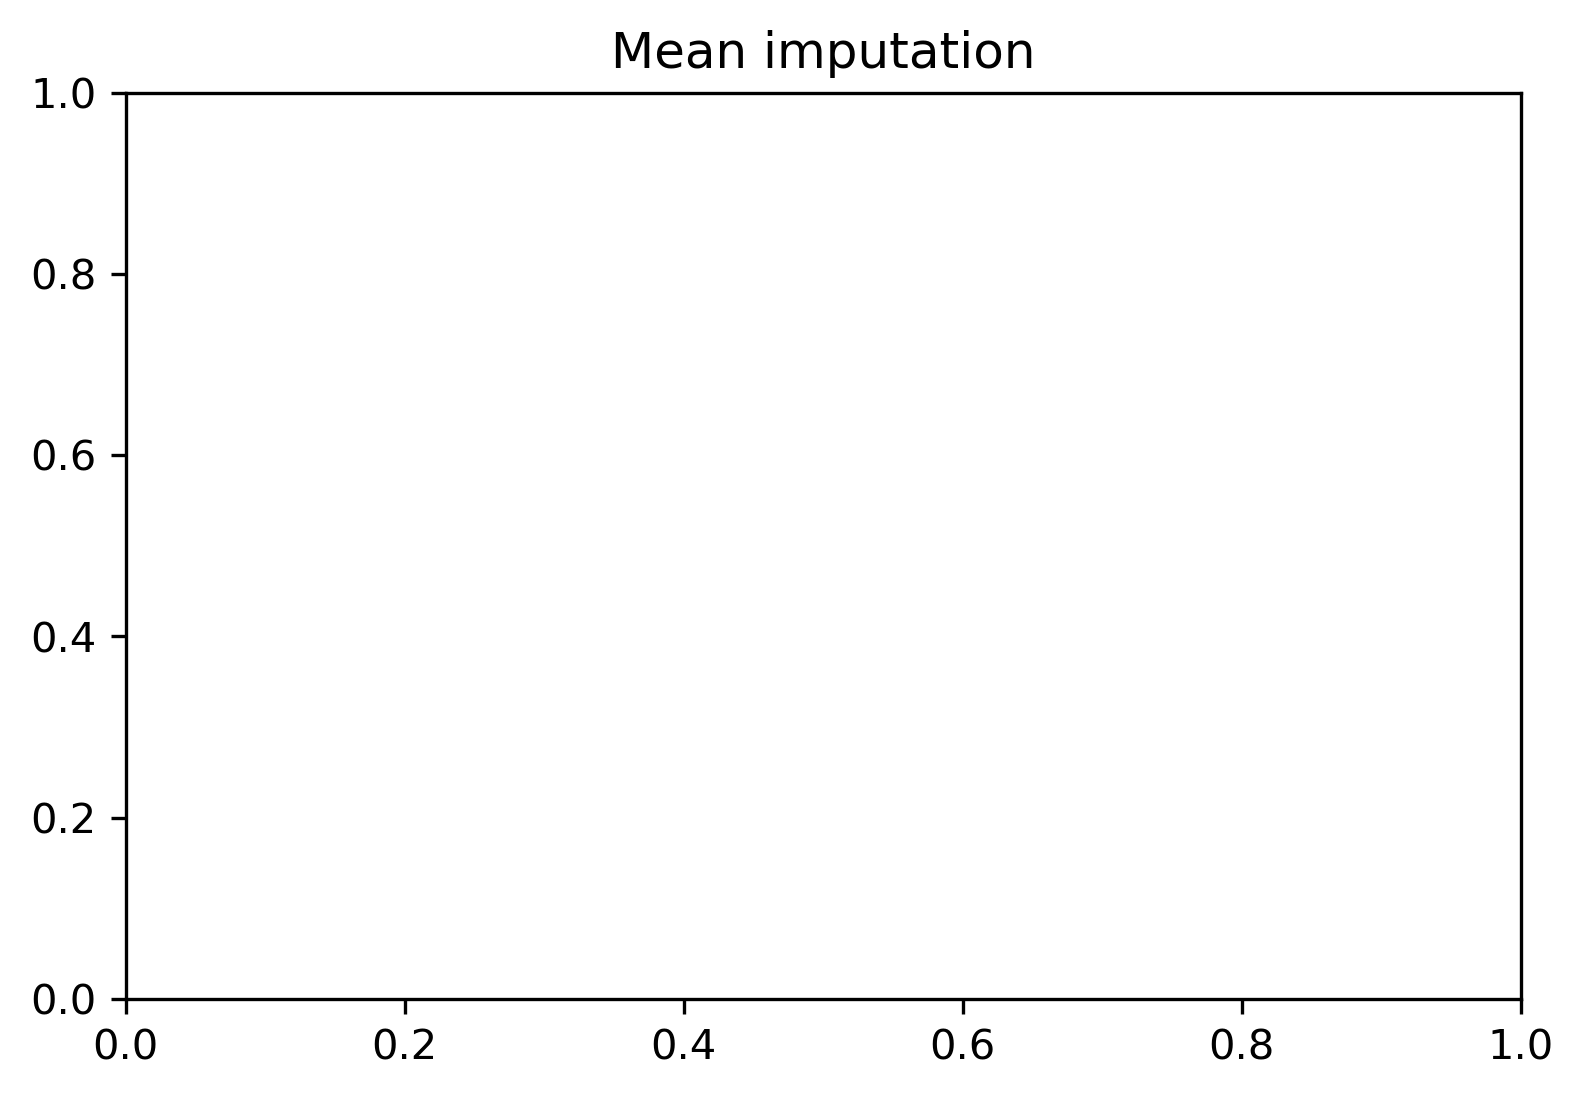

In [21]:
import matplotlib.patches as patches
imputed_mask = np.any(np.isnan(X_train), axis=1)

def plot_imputation(X_imp, title=None, ax=None):
    # helper function to plot imputed data points
    if ax is None:
        ax = plt.gca()
    if title is not None:
        ax.set_title(title)
    ax.scatter(X_imp[imputed_mask, 2], X_imp[imputed_mask, 3], c=plt.cm.Vega10(y_train[imputed_mask]), alpha=.6, marker="s")
    ax.scatter(X_imp[~imputed_mask, 2], X_imp[~imputed_mask, 3], c=plt.cm.Vega10(y_train[~imputed_mask]), alpha=.6)
    # this is for creating the legend...
    square = plt.Line2D((0,), (0,), linestyle='', marker="s", markerfacecolor="w", markeredgecolor="k", label='Imputed data')
    circle = plt.Line2D((0,), (0,), linestyle='', marker="o", markerfacecolor="w", markeredgecolor="k", label='Real data')
    plt.legend(handles=[square, circle], numpoints=1, loc="best")

plot_imputation(X_mean_imp, "Mean imputation")

In [ ]:
# the problem is designed that way that mean imputation wouldn't work

In [22]:
logreg = LogisticRegression().fit(X_mean_imp, y_train)

X_mean_imp_test = imp.transform(X_test)
logreg.score(X_mean_imp_test, y_test)

C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8157894736842105